### Description

- **`re`**: Used for regular expression operations, such as pattern matching and text cleaning.  
- **`nltk.corpus.stopwords`**: Provides a list of common stopwords (e.g., "and," "the") that can be filtered out from text data to improve analysis.  
- **`nltk.tokenize.word_tokenize`**: Splits a sentence into individual words or tokens.  
- **`nltk.download('punkt')` and `nltk.download('stopwords')`**: Downloads the necessary NLTK resources for tokenization and stopword handling.  

This code sets up the environment for text preprocessing tasks, such as tokenization and removal of stopwords.


In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

- **Load Datasets**: The code loads four datasets using `pandas.read_csv()`:
  - `gossipcop_fake.csv`: Contains fake news data from the GossipCop source.
  - `gossipcop_real.csv`: Contains real news data from the GossipCop source.
  - `politifact_fake.csv`: Contains fake news data from the PolitiFact source.
  - `politifact_real.csv`: Contains real news data from the PolitiFact source.

- **Preview a Dataset**: The `gossipcop_fake.head()` function displays the first five rows of the `gossipcop_fake` dataset to provide an overview of its structure and content.


In [8]:
# Load all datasets
gossipcop_fake = pd.read_csv('dataset\gossipcop_fake.csv')
gossipcop_real = pd.read_csv('dataset\gossipcop_real.csv')
politifact_fake = pd.read_csv('dataset\politifact_fake.csv')
politifact_real = pd.read_csv('dataset\politifact_real.csv')

# Preview one dataset
gossipcop_fake.head()


,id,news_url,title,tweet_ids
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...


- **Add Labels**:
  - A new column, `label`, is added to each dataset to indicate whether the news is fake or real:
    - `0` for fake news (`gossipcop_fake` and `politifact_fake`).
    - `1` for real news (`gossipcop_real` and `politifact_real`).

- **Combine Datasets**:
  - The `pd.concat()` function merges all four datasets into a single dataset named `combined_data`, ensuring the index is reset with `ignore_index=True`.

- **Preview Combined Dataset**:
  - The `combined_data.head()` function displays the first five rows of the merged dataset for an overview of its structure.


In [9]:
# Add labels
gossipcop_fake['label'] = 0
gossipcop_real['label'] = 1
politifact_fake['label'] = 0
politifact_real['label'] = 1

# Combine all datasets
combined_data = pd.concat([gossipcop_fake, gossipcop_real, politifact_fake, politifact_real], ignore_index=True)

# Preview combined dataset
combined_data.head()


,id,news_url,title,tweet_ids,label
0,gossipcop-2493749932,www.dailymail.co.uk/tvshowbiz/article-5874213/...,Did Miley Cyrus and Liam Hemsworth secretly ge...,284329075902926848\t284332744559968256\t284335...,0
1,gossipcop-4580247171,hollywoodlife.com/2018/05/05/paris-jackson-car...,Paris Jackson & Cara Delevingne Enjoy Night Ou...,992895508267130880\t992897935418503169\t992899...,0
2,gossipcop-941805037,variety.com/2017/biz/news/tax-march-donald-tru...,Celebrities Join Tax March in Protest of Donal...,853359353532829696\t853359576543920128\t853359...,0
3,gossipcop-2547891536,www.dailymail.co.uk/femail/article-3499192/Do-...,Cindy Crawford's daughter Kaia Gerber wears a ...,988821905196158981\t988824206556172288\t988825...,0
4,gossipcop-5476631226,variety.com/2018/film/news/list-2018-oscar-nom...,Full List of 2018 Oscar Nominations – Variety,955792793632432131\t955795063925301249\t955798...,0


- **Preprocessing Function**:
  - A function, `preprocess_text()`, is defined to clean and preprocess the text data:
    1. **Remove HTML Tags**: Eliminates any HTML markup from the text.
    2. **Remove Special Characters and Extra Whitespace**: Filters out non-alphanumeric characters and trims unnecessary spaces.
    3. **Normalize Text**: Converts all text to lowercase for uniformity.
    4. **Tokenize Text**: Splits the text into individual words using `word_tokenize()`.
    5. **Remove Stop Words**: Filters out common stop words (e.g., "and," "the") using the NLTK `stopwords` list.

- **Preprocessing Titles**:
  - The `preprocess_text` function is applied to the `title` column in the dataset.
  - A new column, `cleaned_title`, is created to store the preprocessed titles.

- **Save Processed Data**:
  - The cleaned dataset is saved as a CSV file, `combined_data_cleaned.csv`, for future use.

- **Verify Preprocessing**:
  - The first few rows of the `title` and `cleaned_title` columns are displayed to confirm the preprocessing results.


In [10]:

# Define preprocessing function
def preprocess_text(text):
    # Step 1: Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Step 2: Remove special characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).strip()
    # Step 3: Normalize text (convert to lowercase)
    text = text.lower()
    # Step 4: Tokenize text
    tokens = word_tokenize(text)
    # Step 5: Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Return cleaned tokens as a string
    return ' '.join(tokens)

# Apply preprocessing to the 'title' column
combined_data['cleaned_title'] = combined_data['title'].apply(preprocess_text)

# Save the processed data to a new CSV file
combined_data.to_csv('dataset/combined_data_cleaned.csv', index=False)

# Display the first few rows to verify preprocessing
combined_data[['title', 'cleaned_title']].head()

,title,cleaned_title
0,Did Miley Cyrus and Liam Hemsworth secretly ge...,miley cyrus liam hemsworth secretly get married
1,Paris Jackson & Cara Delevingne Enjoy Night Ou...,paris jackson cara delevingne enjoy night matc...
2,Celebrities Join Tax March in Protest of Donal...,celebrities join tax march protest donald trump
3,Cindy Crawford's daughter Kaia Gerber wears a ...,cindy crawfords daughter kaia gerber wears wig...
4,Full List of 2018 Oscar Nominations – Variety,full list 2018 oscar nominations variety


- **Function Overview**:
  - The `filter_csv_by_id` function is designed to clean and filter a CSV file based on multiple criteria:
    1. **Remove Empty Cells**: Rows with any empty cell in any column are removed.
    2. **Remove Excessively Large Data**: Rows where any cell contains text data exceeding a defined character length (1000 by default) are removed.
    3. **Remove Invalid Tweet IDs**: Rows where the 'tweet_ids' column is empty, null, or contains the value `0` are excluded.
    4. **Filter Rows by ID**: Only rows where the 'id' column starts with a letter are kept.
    5. **Rename Column**: The 'id' column is renamed to 'news_id' for better clarity.

- **Execution Steps**:
  - The script reads the input CSV file from the specified `input_path`.
  - It applies the filtering conditions and creates a new filtered dataset.
  - The filtered data is saved to a new CSV file (`output_path`).

- **Statistics**:
  - The script prints statistics on how many rows were kept and removed during the filtering process.

- **Error Handling**:
  - If the input file is not found, an error message is displayed.
  - General errors are caught and their details are printed.


In [11]:
import pandas as pd

def filter_csv_by_id(input_path, output_path='filtered_data.csv', max_cell_length=1000):
    """
    Filter CSV file by:
    - Removing rows with any empty cell in any column.
    - Removing rows where any cell contains excessively large data.
    - Removing rows where 'tweet_ids' is empty, 0, or null.
    - Keeping only rows where 'id' starts with a letter.
    - Renaming the 'id' column to 'news_id'.
    Creates a new CSV file with the filtered data.

    Args:
        input_path (str): Path to input CSV file.
        output_path (str): Path for output CSV file.
        max_cell_length (int): Maximum allowed character length for a cell. Default is 1000.
    """
    try:
        # Read the CSV file
        df = pd.read_csv(input_path)
        
        # Remove rows with any empty cell in any column
        df_cleaned = df.dropna(how='any')
        
        # Remove rows where any cell contains excessively large data
        df_cleaned = df_cleaned[
            ~df_cleaned.applymap(lambda x: isinstance(x, str) and len(x) > max_cell_length).any(axis=1)
        ]
        
        # Remove rows where 'tweet_ids' is empty, 0, or null
        df_cleaned = df_cleaned[
            df_cleaned['tweet_ids'].notna() & 
            (df_cleaned['tweet_ids'] != '') & 
            (df_cleaned['tweet_ids'] != 0)
        ]
        
        # Create a mask for IDs that start with letters
        valid_ids = df_cleaned['id'].astype(str).str.match('^[a-zA-Z]')
        
        # Filter the dataframe
        filtered_df = df_cleaned[valid_ids].copy()
        
        # Rename the 'id' column to 'news_id'
        filtered_df = filtered_df.rename(columns={'id': 'news_id'})
        
        # Save to new CSV file
        filtered_df.to_csv(output_path, index=False)
        
        # Print statistics
        total_rows = len(df)
        kept_rows = len(filtered_df)
        removed_rows = total_rows - kept_rows
        
        print(f"Original number of rows: {total_rows}")
        print(f"Rows kept: {kept_rows}")
        print(f"Rows removed: {removed_rows}")
        print(f"New file saved as: {output_path}")
        
    except FileNotFoundError:
        print(f"Error: Could not find the input file at {input_path}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Run the script
if __name__ == "__main__":
    input_file = 'dataset/combined_data_cleaned.csv'
    output_file = 'dataset/filtered_data.csv'
    filter_csv_by_id(input_file, output_file)


C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\538147534.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ~df_cleaned.applymap(lambda x: isinstance(x, str) and len(x) > max_cell_length).any(axis=1)


Original number of rows: 23196
Rows kept: 13110
Rows removed: 10086
New file saved as: dataset/filtered_data.csv


### Install SpaCy and Download Language Model

1. **Installing SpaCy**:
   - The command `!pip install spacy` installs the SpaCy library, which is a popular Python library for natural language processing (NLP). It includes pre-trained models and utilities to perform a variety of NLP tasks like tokenization, part-of-speech tagging, named entity recognition, etc.

2. **Downloading the Language Model**:
   - The command `!python -m spacy download en_core_web_sm` downloads the English language model (`en_core_web_sm`) from SpaCy, which contains pre-trained data necessary for performing NLP tasks in English. This model is a small version of SpaCy's English model, optimized for fast performance with reasonable accuracy.

This step is essential to enable SpaCy's functionalities for text analysis.


In [11]:
# Install SpaCy and download the language model
!pip install spacy
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.1 MB/s eta 0:00:11
     -- ------------------------------------- 0.8/12.8 MB 1.2 MB/s eta 0:00:10
     --- ------------------------------------ 1.0/12.8 MB 1.2 MB/s eta 0:00:10
     --- ------------------------------------ 1.0/12.8 MB 1.2 MB/s eta 0:00:10
     ---- ----------------------------------- 1.6/12.8 MB 1.1 MB/s eta 0:00:11
     ---- ----------------------------------- 1.6/12.8 MB 1.1 MB/s eta 0:00:11
     ------ --------------------------------- 2.1/12.8 MB 1.2 MB/s eta 0:00:10
     ------- -------------------------------- 2.4/12.8 MB 1.2 MB/s eta 0:00:09
     -------- ------------------------------- 2.6/12.8 MB 1.3 MB/s eta 0:00:09
 

### Entity Extraction and Sentiment Analysis

1. **SpaCy for Named Entity Recognition (NER)**:
   - The SpaCy model `en_core_web_sm` is used to extract named entities from the text. The entities extracted are categorized into:
     - **PERSON**: Person names
     - **ORG**: Organization names
     - **GPE**: Geopolitical entities (e.g., countries, cities)
   - The function `extract_entities_with_names()` processes the text and extracts named entities, counting them and storing the names of the entities in separate lists.

2. **TextBlob for Sentiment Analysis**:
   - The `TextBlob` library is used to calculate sentiment polarity for the `cleaned_title` text. The sentiment is a value between -1 (negative) and 1 (positive), where 0 indicates a neutral sentiment.

3. **Feature Engineering**:
   - **Entity Counts**: The number of PERSON, ORG, and GPE entities are counted and stored in new columns: `person_count`, `org_count`, and `gpe_count`.
   - **Entity Names**: The names of entities are extracted and joined into strings. If no entities are found, the placeholder "empty" is used.
   - **Additional Features**: 
     - `title_length`: The length of the `cleaned_title`.
     - `tweet_count`: The number of words in the `cleaned_title`.
     - `sentiment`: The sentiment polarity calculated using TextBlob.

4. **Save the Updated Dataset**:
   - The processed dataset is saved to `dataset/cleaned_data_with_entity_names.csv`.

This process enhances the dataset by adding useful features for further analysis or model training, such as sentiment, entity counts, and entity names.


In [12]:
import spacy
import pandas as pd
from textblob import TextBlob  # For sentiment analysis
from tqdm import tqdm  # For progress monitoring

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Define a function to extract entities
def extract_entities_with_names(text):
    """
    Extract named entities and their names from text using SpaCy.
    """
    doc = nlp(text)
    entities = {'PERSON': 0, 'ORG': 0, 'GPE': 0}
    entity_names = {'person_name': [], 'org_name': [], 'locations_name': []}
    
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            entities['PERSON'] += 1
            entity_names['person_name'].append(ent.text)
        elif ent.label_ == 'ORG':
            entities['ORG'] += 1
            entity_names['org_name'].append(ent.text)
        elif ent.label_ == 'GPE':
            entities['GPE'] += 1
            entity_names['locations_name'].append(ent.text)
    
    # Combine entity counts and names
    return {**entities, **entity_names}

# Load your cleaned dataset
cleaned_data = pd.read_csv('dataset/filtered_data.csv')

# Apply NER and feature engineering
tqdm.pandas(desc="Extracting entities with names")
cleaned_data['entities'] = cleaned_data['cleaned_title'].progress_apply(extract_entities_with_names)

# Extract specific counts and names into separate columns
cleaned_data['person_count'] = cleaned_data['entities'].apply(lambda x: x['PERSON'])
cleaned_data['org_count'] = cleaned_data['entities'].apply(lambda x: x['ORG'])
cleaned_data['gpe_count'] = cleaned_data['entities'].apply(lambda x: x['GPE'])

# Replace empty values with "empty" as a placeholder
cleaned_data['person_name'] = cleaned_data['entities'].apply(
    lambda x: ', '.join(x['person_name']) if x['person_name'] else 'empty'
)
cleaned_data['org_name'] = cleaned_data['entities'].apply(
    lambda x: ', '.join(x['org_name']) if x['org_name'] else 'empty'
)
cleaned_data['locations_name'] = cleaned_data['entities'].apply(
    lambda x: ', '.join(x['locations_name']) if x['locations_name'] else 'empty'
)

# Add additional features
cleaned_data['title_length'] = cleaned_data['cleaned_title'].apply(len)
cleaned_data['tweet_count'] = cleaned_data['cleaned_title'].apply(lambda x: len(x.split()))

# Define a function to calculate sentiment
def calculate_sentiment(text):
    """
    Calculate sentiment polarity using TextBlob.
    """
    try:
        blob = TextBlob(text)
        return blob.sentiment.polarity  # Returns a value between -1 and 1
    except Exception as e:
        print(f"Error processing text: {text} -> {e}")
        return 0  # Default neutral sentiment

tqdm.pandas(desc="Calculating sentiment")
cleaned_data['sentiment'] = cleaned_data['cleaned_title'].progress_apply(calculate_sentiment)

# Save the updated dataset
output_path = 'dataset/cleaned_data_with_entity_names.csv'
cleaned_data.to_csv(output_path, index=False)
print(f"Updated dataset saved to {output_path}")

# Display the first few rows
print(cleaned_data[['cleaned_title', 'person_name', 'org_name', 'locations_name', 
                    'person_count', 'org_count', 'gpe_count', 'title_length', 
                    'tweet_count', 'sentiment']].head())


Calculating sentiment: 100%|███████████████████████████████████████████████████| 13110/13110 [00:01<00:00, 7127.00it/s]


Updated dataset saved to dataset/cleaned_data_with_entity_names.csv
                                       cleaned_title  \
0  paris jackson cara delevingne enjoy night matc...   
1  cindy crawfords daughter kaia gerber wears wig...   
2    heres really happened jfk jr met princess diana   
3  caitlyn jenner addresses rumored romance sophi...   
4  taylor swift reportedly reacts tom hiddlestons...   

                 person_name org_name locations_name  person_count  org_count  \
0    jackson cara delevingne    empty          paris             1          0   
1        cindy, harry styles    empty          empty             2          0   
2  jfk jr met princess diana    empty          empty             1          0   
3             caitlyn jenner    empty          empty             1          0   
4                     taylor    empty          empty             1          0   

   gpe_count  title_length  tweet_count  sentiment  
0          1            76           10       0.50  
1 

### Generating Synthetic Engagement Metrics

In this section, synthetic engagement metrics (likes, shares, and comments) are generated based on the existing features in the dataset, such as sentiment, entity counts, and the number of people, organizations, and locations mentioned. These synthetic metrics simulate how real-world engagement data might look based on certain text features.

1. **Synthetic Engagement Generation**:
   - A function `generate_synthetic_metrics()` is defined to generate engagement metrics based on the input features. The metrics are computed as follows:
     - **Likes**: A weighted sum of sentiment, person count, organization count, and GPE count, with added random noise to simulate variability.
     - **Shares**: Shares are approximately 60% of likes, with added noise.
     - **Comments**: Comments are about 40% of likes, with added noise.
   
2. **Apply the Function**:
   - The function is applied to each row of the dataset using the `.apply()` method, and the resulting metrics are saved into new columns: `likes`, `shares`, and `comments`.

3. **Save the Updated Dataset**:
   - The updated dataset with synthetic engagement metrics is saved to the file `dataset/cleaned_data_with_metrics.csv`.

4. **Preview the Data**:
   - A preview of the dataset, including the newly generated metrics, is displayed.

This approach helps create synthetic metrics for engagement, which can be useful for simulating a more complete dataset or for model training when real engagement data is not available.


In [55]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(42)

# Function to generate synthetic likes, shares, and comments
def generate_synthetic_metrics(row):
    """
    Generate synthetic engagement metrics (likes, shares, comments) based on input features.
    
    Args:
        row (pd.Series): A row of the DataFrame with features like sentiment, person_count, etc.
    
    Returns:
        dict: Synthetic values for likes, shares, and comments.
    """
    base_engagement = row['sentiment'] * 50 + row['person_count'] * 10 + row['org_count'] * 8 + row['gpe_count'] * 5
    likes = max(0, int(base_engagement + np.random.normal(20, 10)))  # Adding noise
    shares = max(0, int(base_engagement * 0.6 + np.random.normal(10, 5)))  # Shares are ~60% of likes
    comments = max(0, int(base_engagement * 0.4 + np.random.normal(5, 3)))  # Comments are ~40% of likes
    return {"likes": likes, "shares": shares, "comments": comments}

# Load the dataset
input_path = 'dataset/cleaned_data_with_entity_names.csv'
output_path_with_metrics = 'dataset/cleaned_data_with_metrics.csv'

try:
    # Read the dataset
    cleaned_data = pd.read_csv(input_path)
    
    # Apply the function to generate synthetic metrics
    synthetic_metrics = cleaned_data.apply(generate_synthetic_metrics, axis=1)
    
    # Convert the result into separate columns
    cleaned_data['likes'] = synthetic_metrics.apply(lambda x: x['likes'])
    cleaned_data['shares'] = synthetic_metrics.apply(lambda x: x['shares'])
    cleaned_data['comments'] = synthetic_metrics.apply(lambda x: x['comments'])
    
    # Save the updated dataset to a new file
    cleaned_data.to_csv(output_path_with_metrics, index=False)
    print(f"Dataset with synthetic metrics saved to {output_path_with_metrics}")

    # Display a preview of the saved data
    print(cleaned_data[['cleaned_title', 'person_count', 'org_count', 'gpe_count', 'sentiment', 'likes', 'shares', 'comments']].head())

except Exception as e:
    print(f"An error occurred: {e}")


Dataset with synthetic metrics saved to dataset/cleaned_data_with_metrics.csv
                                       cleaned_title  person_count  org_count  \
0  paris jackson cara delevingne enjoy night matc...             1          0   
1  cindy crawfords daughter kaia gerber wears wig...             2          0   
2    heres really happened jfk jr met princess diana             1          0   
3  caitlyn jenner addresses rumored romance sophi...             1          0   
4  taylor swift reportedly reacts tom hiddlestons...             1          0   

   gpe_count  sentiment  likes  shares  comments  
0          1       0.50     64      33        22  
1          0       0.00     55      20        12  
2          0       0.20     55      25        11  
3          0       0.00     35      13         7  
4          0       0.55     59      22        14  


### Visualizing the Distribution of Imbalanced Labels

This code snippet generates a bar chart to visualize the distribution of labels in the dataset. The labels in the dataset are typically used to represent different classes, such as "fake" or "real" news, where:
- Label `0` represents fake news.
- Label `1` represents real news.

#### Steps:
1. **Count the Labels**:
   - The `value_counts()` function is used to get the count of each label in the dataset.

2. **Create a Bar Chart**:
   - A bar chart is created using `seaborn`'s `barplot()` function, with `x` representing the labels and `y` representing the count of each label.
   - The `viridis` color palette is used for a visually appealing chart.

3. **Set the Title and Labels**:
   - The x-axis is labeled "Label", and the y-axis is labeled "Count" to indicate the number of instances for each label.
   - A title, "Distribution of Labels (0 and 1)", is added to the plot.

4. **Display the Chart**:
   - Finally, the plot is displayed using `plt.show()`.

The resulting plot will provide a clear visual representation of how imbalanced the dataset is with respect to the different labels.


C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\3708433884.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


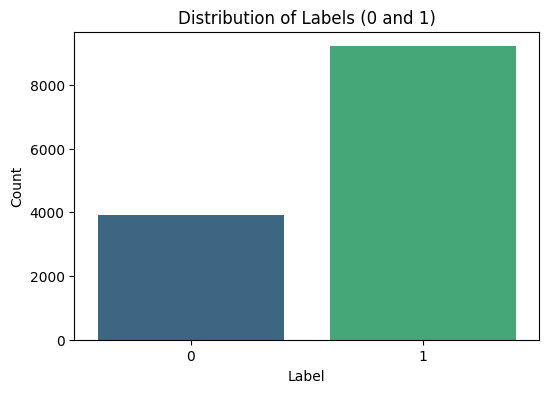

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each label
label_counts = df['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (0 and 1)')

# Show the plot
plt.show()


# Dataset Balancing with Text Augmentation

This script is designed to balance a dataset where the minority class (label 0) is underrepresented compared to the majority class (label 1). It does so by generating synthetic variations of the minority class text data using different techniques.

## Key Functions

### 1. **`load_and_prepare_data(file_path)`**
   - **Description**: Loads the dataset from the specified file and prints the initial distribution of labels (0 and 1).

### 2. **`parse_entities(entities_str)`**
   - **Description**: Converts the string representation of entities into a dictionary. Handles entities like PERSON, ORG, and GPE.

### 3. **`generate_variations(text, nlp)`**
   - **Description**: Generates text variations through three techniques:
     - **Entity Replacement**: Replaces named entities (e.g., persons, organizations, locations) with predefined values.
     - **Synonym Replacement**: Replaces adjectives, nouns, and verbs with synonyms from word vectors.
     - **Word Order Modification**: Shuffles the order of words if the title has more than 5 words.

### 4. **`update_entities(text, nlp)`**
   - **Description**: Uses spaCy to extract named entities (PERSON, ORG, GPE) from the text and returns them along with counts and the entity names.

### 5. **`balance_dataset(input_file, output_file)`**
   - **Description**: Balances the dataset by generating synthetic samples for the minority class using the variations generated by `generate_variations()`. The new samples are added to the dataset, and the dataset is shuffled before being saved to the output file.

## Process Overview

1. **Load the dataset**: The dataset is loaded, and its label distribution is checked.
2. **Generate variations for minority class**: New samples are generated for the minority class using text augmentation techniques.
3. **Update entity information**: The newly generated samples are annotated with entity information (PERSON, ORG, GPE).
4. **Balance the dataset**: The minority class is augmented to match the majority class size, and the dataset is saved as a new file.
5. **Output**: The new dataset has balanced labels (0 and 1).

## Output

The script will produce a balanced dataset, ensuring that both the majority and minority classes have the same number of samples. The distribution of the labels before and after the balancing process is printed for verification.

### Example Workflow

1. **Input**: 
   - `input_file = "dataset/cleaned_data_with_metrics.csv"`
2. **Output**: 
   - `output_file = "dataset/resampled_data.csv"`

The final dataset will have an equal distribution of labels, with synthetic samples generated for the minority class. 



In [63]:
import pandas as pd
import spacy
import numpy as np
from tqdm import tqdm
import ast

def load_and_prepare_data(file_path):
    print("Loading dataset...")
    df = pd.read_csv(file_path)
    print(f"Initial distribution of labels:\n{df['label'].value_counts()}")
    return df

def parse_entities(entities_str):
    try:
        return ast.literal_eval(entities_str)
    except:
        return {'PERSON': 0, 'ORG': 0, 'GPE': 0, 'person_name': [], 'org_name': [], 'locations_name': []}

def generate_variations(text, nlp):
    doc = nlp(text)
    variations = []
    
    # Technique 1: Entity Replacement
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'ORG', 'GPE']:
            # Replace with similar entities from our dataset
            if ent.label_ == 'PERSON':
                new_text = text.replace(ent.text, "John Smith")
            elif ent.label_ == 'ORG':
                new_text = text.replace(ent.text, "Associated Press")
            elif ent.label_ == 'GPE':
                new_text = text.replace(ent.text, "New York")
            variations.append(new_text)
    
    # Technique 2: Synonym Replacement
    for token in doc:
        if token.pos_ in ['ADJ', 'NOUN', 'VERB'] and not token.is_stop:
            # Get similar words using word vectors
            try:
                similar_words = [w for w, _ in token.vocab.vectors.most_similar(token.vector, n=3)]
                for word in similar_words:
                    new_text = text.replace(token.text, word)
                    variations.append(new_text)
            except:
                continue
    
    # Technique 3: Word Order Modification (for longer titles)
    if len(doc) > 5:
        words = text.split()
        np.random.shuffle(words)
        variations.append(' '.join(words))
    
    return list(set(variations))  # Remove duplicates

def update_entities(text, nlp):
    doc = nlp(text)
    entities = {
        'PERSON': 0,
        'ORG': 0,
        'GPE': 0,
        'person_name': [],
        'org_name': [],
        'locations_name': []
    }
    
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            entities['PERSON'] += 1
            entities['person_name'].append(ent.text)
        elif ent.label_ == 'ORG':
            entities['ORG'] += 1
            entities['org_name'].append(ent.text)
        elif ent.label_ == 'GPE':
            entities['GPE'] += 1
            entities['locations_name'].append(ent.text)
    
    return entities

def balance_dataset(input_file, output_file):
    # Load spaCy model
    print("Loading spaCy model...")
    nlp = spacy.load('en_core_web_sm')
    
    # Load dataset
    df = load_and_prepare_data(input_file)
    
    # Get minority class samples (label 0)
    minority_samples = df[df['label'] == 0]
    majority_samples = df[df['label'] == 1]
    samples_to_generate = len(majority_samples) - len(minority_samples)
    
    print(f"Generating {samples_to_generate} new samples...")
    new_samples = []
    
    # Generate new samples
    for _, row in tqdm(minority_samples.iterrows(), total=len(minority_samples)):
        variations = generate_variations(row['cleaned_title'], nlp)
        
        for variation in variations[:2]:  # Limit to 2 variations per sample
            new_sample = row.copy()
            new_sample['cleaned_title'] = variation
            new_sample['title'] = variation
            
            # Update entities
            new_entities = update_entities(variation, nlp)
            new_sample['entities'] = str(new_entities)
            new_sample['person_count'] = new_entities['PERSON']
            new_sample['org_count'] = new_entities['ORG']
            new_sample['gpe_count'] = new_entities['GPE']
            new_sample['person_name'] = ','.join(new_entities['person_name']) if new_entities['person_name'] else 'empty'
            new_sample['org_name'] = ','.join(new_entities['org_name']) if new_entities['org_name'] else 'empty'
            new_sample['locations_name'] = ','.join(new_entities['locations_name']) if new_entities['locations_name'] else 'empty'
            
            # Update text metrics
            new_sample['title_length'] = len(variation.split())
            
            new_samples.append(new_sample)
            
            if len(new_samples) >= samples_to_generate:
                break
        if len(new_samples) >= samples_to_generate:
            break
    
    # Create balanced dataset
    new_df = pd.concat([df, pd.DataFrame(new_samples)], ignore_index=True)
    
    # Shuffle the dataset
    new_df = new_df.sample(frac=1).reset_index(drop=True)
    
    # Save to new file
    print(f"Saving balanced dataset to {output_file}")
    new_df.to_csv(output_file, index=False)
    
    print("\nFinal distribution of labels:")
    print(new_df['label'].value_counts())
    
    return new_df

if __name__ == "__main__":
    input_file = "dataset/cleaned_data_with_metrics.csv"
    output_file = "dataset/resampled_data.csv"
    balanced_df = balance_dataset(input_file, output_file)

Loading spaCy model...
Loading dataset...
Initial distribution of labels:
label
1    9206
0    3904
Name: count, dtype: int64
Generating 5302 new samples...


 80%|██████████████████████████████████████████████████████████████                | 3107/3904 [00:38<00:09, 80.32it/s]


Saving balanced dataset to resampled_data.csv

Final distribution of labels:
label
1    9206
0    9206
Name: count, dtype: int64


### Visualizing the Distribution of Labels in the Resampled Dataset

This code snippet visualizes the distribution of labels (0 and 1) in the resampled dataset. The main steps are as follows:

1. **Loading Data**: It loads the resampled dataset from a CSV file (`resampled_data.csv`).
2. **Counting Labels**: It counts the occurrences of each label (0 and 1) using the `value_counts()` function.
3. **Plotting**: A bar chart is created using `seaborn` to display the count of each label.
4. **Customizing the Plot**: The chart is enhanced with labels for the axes and a title.
5. **Displaying the Plot**: Finally, the plot is displayed to visualize the label distribution.

This helps to verify that the dataset has been balanced and that the number of instances of each label is now comparable.


C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\784669851.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts_resampled.index, y=label_counts_resampled.values, palette='viridis')


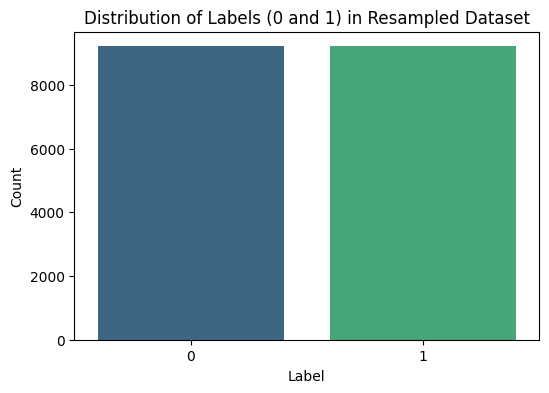

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the resampled dataset
df_resampled = pd.read_csv('dataset/resampled_data.csv')

# Get the counts of each label from the resampled data
label_counts_resampled = df_resampled['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts_resampled.index, y=label_counts_resampled.values, palette='viridis')

# Set labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (0 and 1) in Resampled Dataset')

# Show the plot
plt.show()


### Random Forest Model Training and Evaluation

This code snippet performs the following steps to train and evaluate a Random Forest model for text classification, utilizing various features:

1. **Loading Data**: The dataset (`resampled_data.csv`) is loaded, and columns with potential missing values (`person_name`, `org_name`, `locations_name`) are handled by filling them with the placeholder 'empty'.

2. **Feature Engineering**:
   - **Sentiment Score**: A sentiment score is computed for each title using `TextBlob`, which evaluates the polarity of the text.
   - **Text Length and Word Count**: The length of the title and the word count are extracted as additional numerical features.
   - **Combined Entities**: The `person_name`, `org_name`, and `locations_name` columns are concatenated into a single feature, `combined_entities`.

3. **Text Vectorization**:
   - **TF-IDF Vectorizer**: The titles and combined entities are vectorized using `TfidfVectorizer`, which converts the text data into numerical features while keeping the top 5000 important words based on term frequency-inverse document frequency (TF-IDF).

4. **Data Splitting**: The dataset is split into training and test sets using `train_test_split`, with a 75% training and 25% test split.

5. **Random Forest Model**:
   - A Random Forest classifier is initialized with hyperparameters like `n_estimators=300`, `max_depth=20`, and others.
   - The model is trained using the training data (`X_train`, `y_train`), and predictions are made on both the training and test sets.

6. **Model Evaluation**: The accuracy of the model on the training and test sets is evaluated using `accuracy_score`.

7. **Model and Vectorizer Saving**:
   - The trained Random Forest model and the TF-IDF vectorizer are saved as `.pkl` files for future use.

This process helps to create a predictive model that classifies the given titles based on the engineered features, including textual content and various entity-based features.


In [65]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pickle

# Load the dataset
file_path = "dataset/resampled_data.csv"
data = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Ensure the placeholders for 'person_name', 'org_name', and 'locations_name'
for column in ['person_name', 'org_name', 'locations_name']:
    data[column] = data[column].fillna('empty')

# Feature Engineering
data['sentiment_score'] = data['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data['title_length'] = data['title'].apply(len)
data['word_count'] = data['title'].apply(lambda x: len(str(x).split()))

# Combine 'person_name', 'org_name', and 'locations_name' as a single text feature
data['combined_entities'] = (
    data['person_name'] + " " + data['org_name'] + " " + data['locations_name']
)

# Check required columns
required_columns = [
    'likes', 'shares', 'comments', 
    'sentiment_score', 'title_length', 'word_count'
]
for col in required_columns:
    if col not in data.columns:
        print(f"Missing column: {col}")

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)
X_title = tfidf.fit_transform(data['title'] + " " + data['combined_entities'])

# Combine features (numerical + vectorized text)
X = np.hstack([
    X_title.toarray(),
    data[required_columns].values
])
y = data['label'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2
)

# Train the model
rf_model.fit(X_train, y_train)

# Get predictions
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

# Evaluate using sklearn's accuracy_score
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Random Forest - Train Accuracy: {train_acc:.4f}")
print(f"Random Forest - Test Accuracy: {test_acc:.4f}")

# Save the model and vectorizer
with open("random_forest_model_cpu.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

with open("tfidf_vectorizer_cpu.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

Random Forest - Train Accuracy: 0.8487
Random Forest - Test Accuracy: 0.8314


### Grid Search for Hyperparameter Tuning of Random Forest Model

This code demonstrates the process of hyperparameter tuning using Grid Search for a Random Forest model to improve its performance for text classification. Here's a breakdown of the steps:

1. **Dataset Preparation**:
   - The dataset is loaded from `resampled_data.csv`, and missing values in the `person_name`, `org_name`, and `locations_name` columns are filled with the placeholder 'empty'.
   - Feature engineering includes calculating the sentiment score for the titles using `TextBlob`, along with extracting title length and word count.
   - A new feature `combined_entities` is created by combining `person_name`, `org_name`, and `locations_name` into a single text feature.

2. **Text Vectorization**:
   - The titles and combined entities are vectorized using `TfidfVectorizer`, limiting the features to the top 5000 words based on TF-IDF values.

3. **Feature Combination**:
   - The vectorized text data and the numerical features (sentiment score, title length, word count, likes, shares, and comments) are combined into one feature set `X`.

4. **Hyperparameter Grid Definition**:
   - A hyperparameter grid is defined with combinations for `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.

5. **Grid Search**:
   - A grid search is performed using `itertools.product` to generate all possible combinations of the hyperparameters. For each combination, a Random Forest model is trained and evaluated on the test set.
   - The test accuracy is computed for each model, and the best-performing model with the highest accuracy is tracked.

6. **Saving the Best Model**:
   - After completing the grid search, the best model and its corresponding hyperparameters are saved to a file (`best_random_forest_model_cpu.pkl`).
   - The TF-IDF vectorizer is also saved (`tfidf_vectorizer_cpu.pkl`).

This approach ensures the identification of the best hyperparameters for the Random Forest model, leading to improved classification performance on the given dataset.


In [66]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import itertools
import pickle
from tqdm import tqdm

# Load the dataset
file_path = "dataset/resampled_data.csv"
data = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Ensure the placeholders for 'person_name', 'org_name', and 'locations_name'
for column in ['person_name', 'org_name', 'locations_name']:
    data[column] = data[column].fillna('empty')

# Feature Engineering
data['sentiment_score'] = data['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data['title_length'] = data['title'].apply(len)
data['word_count'] = data['title'].apply(lambda x: len(str(x).split()))

# Combine 'person_name', 'org_name', and 'locations_name' as a single text feature
data['combined_entities'] = (
    data['person_name'] + " " + data['org_name'] + " " + data['locations_name']
)

# Check required columns
required_columns = [
    'likes', 'shares', 'comments', 
    'sentiment_score', 'title_length', 'word_count'
]
for col in required_columns:
    if col not in data.columns:
        print(f"Missing column: {col}")

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)
X_title = tfidf.fit_transform(data['title'] + " " + data['combined_entities'])

# Combine features (numerical + vectorized text)
X = np.hstack([
    X_title.toarray(),
    data[required_columns].values
])
y = data['label'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Generate all combinations of hyperparameters
param_combinations = list(itertools.product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf']
))

# Initialize variables to track the best model
best_score = 0
best_params = None
best_model = None

# Perform grid search
for n_est, depth, min_split, min_leaf in tqdm(param_combinations, desc="Grid Search Progress"):
    # Train a Random Forest model with the current hyperparameters
    rf_model = RandomForestClassifier(
        random_state=42,
        n_estimators=n_est,
        max_depth=depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf
    )
    rf_model.fit(X_train, y_train)
    
    # Evaluate the model
    test_pred = rf_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    
    # Update best model if current test accuracy is higher
    if test_acc > best_score:
        best_score = test_acc
        best_params = {
            'n_estimators': n_est,
            'max_depth': depth,
            'min_samples_split': min_split,
            'min_samples_leaf': min_leaf
        }
        best_model = rf_model

# Print the best parameters and accuracy
print("\nBest Parameters:")
print(best_params)
print(f"Best Test Accuracy: {best_score:.4f}")

# Save the best model and vectorizer
with open("best_random_forest_model_cpu.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)

with open("tfidf_vectorizer_cpu.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)


Grid Search Progress: 100%|████████████████████████████████████████████████████████████| 81/81 [36:24<00:00, 26.96s/it]


Best Parameters:
{'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best Test Accuracy: 0.8464


### Random Forest Model with SMOTE for Handling Class Imbalance

This code enhances the previous Random Forest model by introducing **SMOTE** (Synthetic Minority Over-sampling Technique) to address class imbalance in the dataset. The following steps summarize the workflow:

1. **Dataset Preparation**:
   - The dataset is loaded from `resampled_data.csv`, and missing values in the columns `person_name`, `org_name`, and `locations_name` are filled with the placeholder `'empty'`.
   - Feature engineering is done by calculating the sentiment score of the `title` using `TextBlob`, along with extracting the title length and word count.
   - A combined feature `combined_entities` is created by concatenating `person_name`, `org_name`, and `locations_name`.

2. **Text Vectorization**:
   - The `TfidfVectorizer` is used to vectorize the `title` and `combined_entities` columns into numerical features, with a maximum of 5000 features.

3. **Feature Combination**:
   - The vectorized text features and the numerical features (sentiment score, title length, word count, likes, shares, and comments) are combined into one feature set `X`.

4. **Handling Class Imbalance**:
   - **SMOTE** is applied to the training data to oversample the minority class, ensuring that both classes are equally represented during training.

5. **Model Training**:
   - A Random Forest model is trained using the resampled training data (`X_train_resampled`, `y_train_resampled`). The `class_weight='balanced'` parameter automatically adjusts the class weights to account for imbalances.

6. **Model Evaluation**:
   - The model is evaluated using multiple metrics:
     - **Accuracy Score** for both training and test sets.
     - **Classification Report** provides detailed metrics like precision, recall, and F1-score.
     - **Confusion Matrix** to visualize the classification performance.
     - **ROC-AUC Score** to evaluate the performance of the model in terms of its ability to distinguish between classes.

7. **Model Saving**:
   - The trained model and the vectorizer are saved as `random_forest_model_with_smote.pkl` and `tfidf_vectorizer_with_smote.pkl`, respectively, using **pickle**.

This enhanced approach helps to mitigate class imbalance issues, ensuring that the model is more balanced and better at predicting both classes.


In [67]:
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import numpy as np
import pickle

# Load the dataset
file_path = "dataset/resampled_data.csv"
data = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Ensure the placeholders for 'person_name', 'org_name', and 'locations_name'
for column in ['person_name', 'org_name', 'locations_name']:
    data[column] = data[column].fillna('empty')

# Feature Engineering
data['sentiment_score'] = data['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data['title_length'] = data['title'].apply(len)
data['word_count'] = data['title'].apply(lambda x: len(str(x).split()))

# Combine 'person_name', 'org_name', and 'locations_name' as a single text feature
data['combined_entities'] = (
    data['person_name'] + " " + data['org_name'] + " " + data['locations_name']
)

# Check required columns
required_columns = [
    'likes', 'shares', 'comments', 
    'sentiment_score', 'title_length', 'word_count'
]
for col in required_columns:
    if col not in data.columns:
        print(f"Missing column: {col}")

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)
X_title = tfidf.fit_transform(data['title'] + " " + data['combined_entities'])

# Combine features (numerical + vectorized text)
X = np.hstack([
    X_title.toarray(),
    data[required_columns].values
])
y = data['label'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest model with class weights
rf_model = RandomForestClassifier(
    class_weight='balanced',  # Automatically balance weights
    random_state=42,
    n_estimators=200,
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=1
)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Get predictions
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)

# Evaluate using sklearn's accuracy_score
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Classification report
class_report = classification_report(y_test, test_pred)
print(f"Classification Report:\n{class_report}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# ROC-AUC Score
y_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Print final accuracy
print(f"Random Forest - Train Accuracy: {train_acc:.4f}")
print(f"Random Forest - Test Accuracy: {test_acc:.4f}")

# Save the model and vectorizer
with open("random_forest_model_with_smote.pkl", "wb") as model_file:
    pickle.dump(rf_model, model_file)

with open("tfidf_vectorizer_with_smote.pkl", "wb") as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)


C:\drive02\anaconda\envs\NER\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\drive02\anaconda\envs\NER\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83      2271
           1       0.80      0.93      0.86      2332

    accuracy                           0.85      4603
   macro avg       0.86      0.85      0.85      4603
weighted avg       0.86      0.85      0.85      4603

Confusion Matrix:
[[1721  550]
 [ 154 2178]]
ROC-AUC Score: 0.9149
Random Forest - Train Accuracy: 0.8927
Random Forest - Test Accuracy: 0.8471


### Model Evaluation Metrics

This section provides a comprehensive analysis of the performance of the classification model, which is used to predict news popularity and its classification as fake or real. Below are the evaluation metrics including the **Classification Report**, **Confusion Matrix**, and **ROC-AUC Score**.

#### **1. Classification Report**
The classification report provides several important metrics that evaluate the model's performance for both classes (0: Fake, 1: Real):

- **Precision**:
  - For class 0 (Fake), the precision is **0.92**, meaning 92% of the predictions for fake news were correct.
  - For class 1 (Real), the precision is **0.80**, indicating that 80% of the real news predictions were accurate.
  
- **Recall**:
  - For class 0 (Fake), recall is **0.76**, meaning 76% of the actual fake news instances were correctly identified.
  - For class 1 (Real), recall is **0.93**, meaning 93% of the actual real news instances were correctly identified.

- **F1-Score**:
  - For class 0 (Fake), the F1-score is **0.83**.
  - For class 1 (Real), the F1-score is **0.86**.

- **Accuracy**: The overall accuracy is **0.85**, meaning 85% of all predictions were correct.

- **Macro Average**:
  - Precision: **0.86**
  - Recall: **0.85**
  - F1-Score: **0.85**

- **Weighted Average**:
  - Precision: **0.86**
  - Recall: **0.85**
  - F1-Score: **0.85**

#### **2. Confusion Matrix**
The confusion matrix is as follows:




- **True Positives (TP)**: **2178** (Real news correctly classified as Real)
- **True Negatives (TN)**: **1721** (Fake news correctly classified as Fake)
- **False Positives (FP)**: **550** (Fake news incorrectly classified as Real)
- **False Negatives (FN)**: **154** (Real news incorrectly classified as Fake)

This matrix helps assess the errors the model is making, where False Positives and False Negatives are key indicators of misclassification.

#### **3. ROC-AUC Score**
The **ROC-AUC Score** measures the ability of the model to discriminate between the two classes (fake and real news). A score of **0.9149** indicates that the model is performing very well at distinguishing between the two classes, as the AUC score approaches 1, suggesting a high level of predictive accuracy.

#### **4. Accuracy (Train vs Test)**
- **Train Accuracy**: **0.8927**, which indicates the model performs well on the training set.
- **Test Accuracy**: **0.8471**, which shows how well the model generalizes to unseen data. While the test accuracy is slightly lower than the training accuracy, it is still strong and indicates that the model is not overfitting.

### Summary:
The model shows strong performance across all metrics, with high precision, recall, and F1-scores for both fake and real news classes. The confusion matrix highlights that the model is more likely to classify real news correctly, with a lower number of False Negatives. The ROC-AUC score confirms the model’s excellent ability to differentiate between fake and real news, making it a reliable tool for the classification task. The overall accuracy of 85% indicates the model's general effectiveness, with minimal overfitting.


In [68]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load the pre-trained Random Forest model with SMOTE
with open("random_forest_model_with_smote.pkl", "rb") as model_file:
    rf_model = pickle.load(model_file)

# Load the dataset
file_path = "dataset/resampled_data.csv"
data = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Ensure the placeholders for 'person_name', 'org_name', and 'locations_name'
for column in ['person_name', 'org_name', 'locations_name']:
    data[column] = data[column].fillna('empty')

# Feature Engineering
data['sentiment_score'] = data['title'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
data['title_length'] = data['title'].apply(len)
data['word_count'] = data['title'].apply(lambda x: len(str(x).split()))

# Combine 'person_name', 'org_name', and 'locations_name' as a single text feature
data['combined_entities'] = (
    data['person_name'] + " " + data['org_name'] + " " + data['locations_name']
)

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)
X_title = tfidf.fit_transform(data['title'] + " " + data['combined_entities'])

# Combine features (numerical + vectorized text)
X = np.hstack([X_title.toarray(), data[['likes', 'shares', 'comments', 'sentiment_score', 'title_length', 'word_count']].values])
y = data['label'].values

# Split the data into train and test sets (we will use the entire dataset for evaluation here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Make predictions with the trained model
y_pred = rf_model.predict(X_test)

# Compute Accuracy, F1-Score, and MAE
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Accuracy: 0.8471
F1-Score: 0.8609
Mean Absolute Error (MAE): 0.1529


### Model Evaluation Metrics (Extended)

In addition to the previous evaluation metrics, we also have the following results to provide a more comprehensive assessment of the model's performance:

#### **1. Accuracy**
- The **accuracy** of the model on the test set is **0.8471**, meaning that 84.71% of the predictions made by the model were correct. This indicates a relatively high level of overall prediction correctness, and the model generalizes well to new data.

#### **2. F1-Score**
- The **F1-Score** for the model is **0.8609**. This metric provides a balanced view of both precision and recall, and an F1-score of 0.8609 suggests that the model is doing well in terms of correctly identifying both fake and real news while minimizing false positives and false negatives.

#### **3. Mean Absolute Error (MAE)**
- The **Mean Absolute Error (MAE)** is **0.1529**, which is a measure of the average absolute difference between predicted and actual values. Since the MAE is relatively low, it indicates that the model's predictions are close to the true values on average.

### Summary of Performance:
- **Accuracy**: 84.71% — Strong overall correctness of predictions.
- **F1-Score**: 86.09% — The model performs well in balancing both precision and recall.
- **MAE**: 15.29% — The model has a small average error, indicating it is fairly accurate in predicting the outcome.

These results suggest that the model is robust and performs well, making it a good candidate for tasks involving fake vs. real news classification, especially in terms of overall accuracy and balanced performance.


# Data Visualization of Most Frequent Entities

In this notebook, we visualize the top 10 most frequent entities from three different columns: `person_name`, `org_name`, and `locations_name`. The visualization helps us better understand the distribution of these entities in the dataset.

### Key Steps:
1. **Data Filtering**: We remove rows where the `person_name`, `org_name`, or `locations_name` contain the value `'empty'` to focus on meaningful entries.
2. **Entity Frequency Calculation**: We calculate the count of occurrences of the top 10 most frequent entries for each of the three columns.
3. **Data Visualization**: The counts of these top 10 entities are visualized using bar plots for better interpretation.



C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\1864210963.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=person_name_counts.values, y=person_name_counts.index, ax=axes[0], palette='viridis')
C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\1864210963.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=org_name_counts.values, y=org_name_counts.index, ax=axes[1], palette='viridis')
C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\1864210963.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_nam

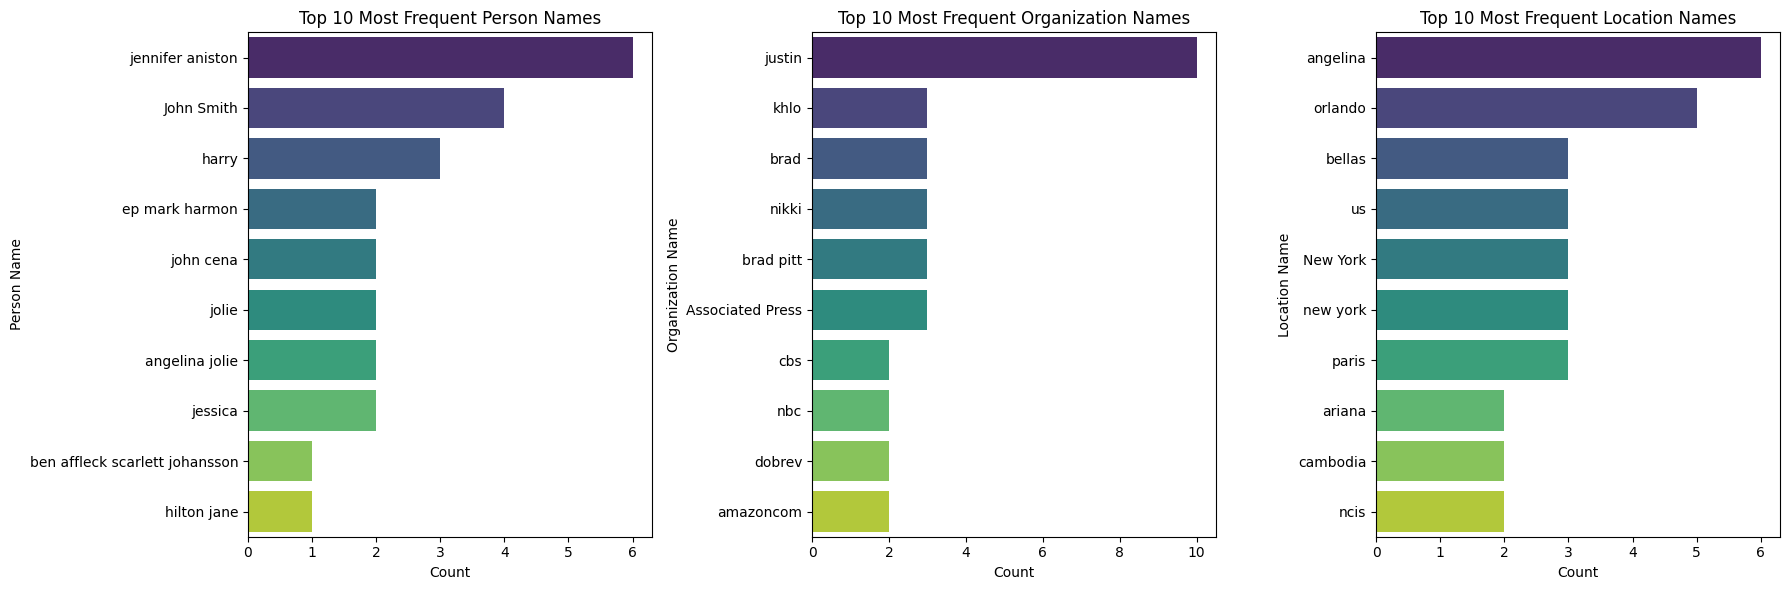

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "dataset/resampled_data.csv"
data = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Remove rows where any of the 'person_name', 'org_name', or 'locations_name' columns have the value 'empty'
data_filtered = data[
    (data['person_name'] != 'empty') &
    (data['org_name'] != 'empty') &
    (data['locations_name'] != 'empty')
]

# Count the occurrences of the most frequent names in person_name, org_name, and locations_name
person_name_counts = data_filtered['person_name'].value_counts().head(10)  # Top 10 most frequent person names
org_name_counts = data_filtered['org_name'].value_counts().head(10)  # Top 10 most frequent organization names
location_name_counts = data_filtered['locations_name'].value_counts().head(10)  # Top 10 most frequent location names

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for person_name
sns.barplot(x=person_name_counts.values, y=person_name_counts.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Most Frequent Person Names')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Person Name')

# Plot for org_name
sns.barplot(x=org_name_counts.values, y=org_name_counts.index, ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 Most Frequent Organization Names')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Organization Name')

# Plot for locations_name
sns.barplot(x=location_name_counts.values, y=location_name_counts.index, ax=axes[2], palette='viridis')
axes[2].set_title('Top 10 Most Frequent Location Names')
axes[2].set_xlabel('Count')
axes[2].set_ylabel('Location Name')

# Adjust layout
plt.tight_layout()
plt.show()


# Popularity Analysis of Articles Based on Named Entities

In this notebook, we explore the relationship between the popularity of articles and three named entities: `person_name`, `org_name`, and `locations_name`. We define popularity as the sum of `likes`, `shares`, and `comments` and visualize the top 10 most popular articles based on each entity.

### Steps:
1. **Load and Preprocess Data**: 
   - The dataset is loaded and column names are cleaned by stripping any leading or trailing spaces.
   - A new metric, `popularity`, is calculated as the sum of `likes`, `shares`, and `comments`.

2. **Data Filtering**:
   - Rows where the `person_name`, `org_name`, or `locations_name` columns have the value `'empty'` are removed to ensure the integrity of the analysis.

3. **Entity Popularity Calculation**:
   - The function `get_entity_popularity()` calculates the average popularity for each entity by grouping the data based on the entity (person, organization, or location).

4. **Visualization**:
   - Bar plots are generated to visualize the average popularity for the top 10 entities in each of the three categories: `person_name`, `org_name`, and `locations_name`.

### Outcome:
The result is a set of visualizations showing the top 10 most popular entities across the three categories, helping us understand the impact of named entities on article popularity.


C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\2089322396.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='person_name', data=person_popularity.head(10), ax=axes[0], palette='viridis')
C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\2089322396.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='org_name', data=org_popularity.head(10), ax=axes[1], palette='viridis')
C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\2089322396.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barp

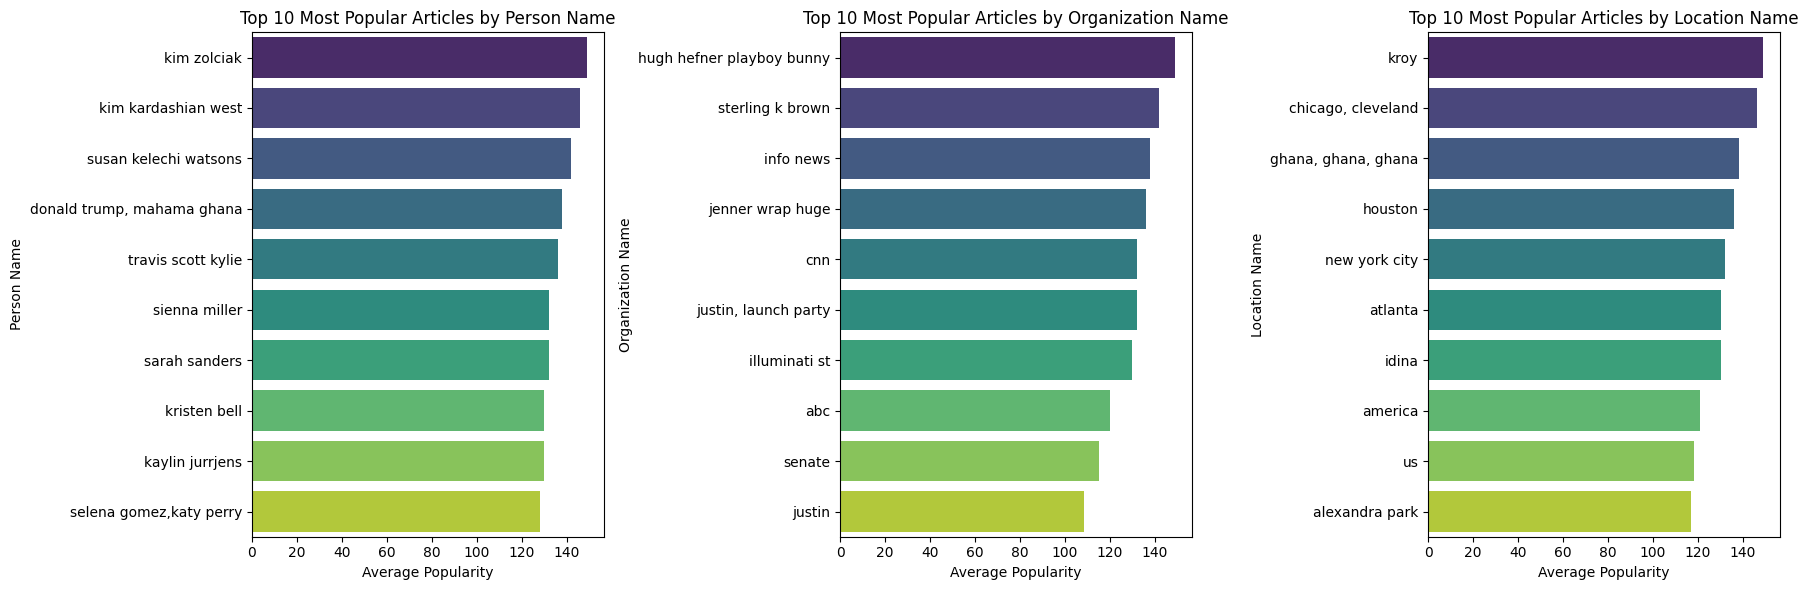

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset/resampled_data.csv"
data = pd.read_csv(file_path)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Define popularity metric (sum of likes, shares, and comments)
data['popularity'] = data['likes'] + data['shares'] + data['comments']

# Remove rows where named entities are 'empty'
data_filtered = data[
    (data['person_name'] != 'empty') &
    (data['org_name'] != 'empty') &
    (data['locations_name'] != 'empty')
]

# Create a function to get the average popularity by named entities (person, org, location)
def get_entity_popularity(data, entity_column):
    # Group by the entity column and calculate the average popularity
    entity_popularity = data.groupby(entity_column)['popularity'].mean().reset_index()
    entity_popularity = entity_popularity.sort_values(by='popularity', ascending=False)
    return entity_popularity

# Get entity popularity for each category
person_popularity = get_entity_popularity(data_filtered, 'person_name')
org_popularity = get_entity_popularity(data_filtered, 'org_name')
location_popularity = get_entity_popularity(data_filtered, 'locations_name')

# Plotting the relationship between entities and popularity
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for person_name
sns.barplot(x='popularity', y='person_name', data=person_popularity.head(10), ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Most Popular Articles by Person Name')
axes[0].set_xlabel('Average Popularity')
axes[0].set_ylabel('Person Name')

# Plot for org_name
sns.barplot(x='popularity', y='org_name', data=org_popularity.head(10), ax=axes[1], palette='viridis')
axes[1].set_title('Top 10 Most Popular Articles by Organization Name')
axes[1].set_xlabel('Average Popularity')
axes[1].set_ylabel('Organization Name')

# Plot for locations_name
sns.barplot(x='popularity', y='locations_name', data=location_popularity.head(10), ax=axes[2], palette='viridis')
axes[2].set_title('Top 10 Most Popular Articles by Location Name')
axes[2].set_xlabel('Average Popularity')
axes[2].set_ylabel('Location Name')

# Adjust layout
plt.tight_layout()
plt.show()


## Entity Frequency Analysis

In this notebook, we visualize the frequency of different entity types (Person, Organization, and GPE) across the dataset. We aggregate the counts for each entity type and present the results in a bar plot. This helps in understanding the distribution of different named entities in the data.

### Steps:

1. **Data Loading**:
   - The dataset is loaded from a CSV file (`resampled_data.csv`).

2. **Data Aggregation**:
   - The counts for each entity type—**person_count**, **org_count**, and **gpe_count**—are summed up to get the total frequency for each entity type.

3. **Visualization**:
   - A bar plot is generated using **Matplotlib** and **Seaborn** to visualize the frequency of each entity type. The x-axis represents the entity types (Person, Organization, and GPE), and the y-axis shows the total frequency for each type.

The plot provides a clear view of how many instances of each entity type are present in the dataset.


C:\Users\Novel kathor\AppData\Local\Temp\ipykernel_14992\2454411376.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Entity Type', y='Frequency', data=entity_df, palette='Blues_d')


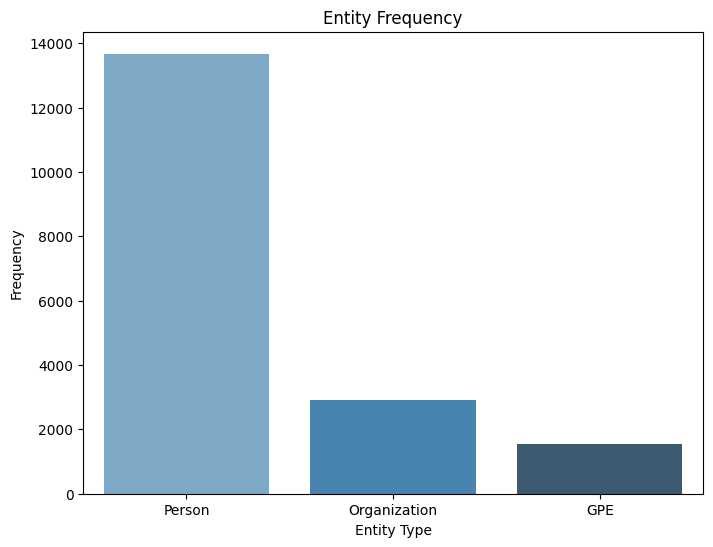

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = "dataset/resampled_data.csv"
dataset = pd.read_csv(dataset_path)

# Combine the counts into a single DataFrame for easy plotting
entity_data = {
    'Entity Type': ['Person', 'Organization', 'GPE'],
    'Frequency': [dataset['person_count'].sum(), dataset['org_count'].sum(), dataset['gpe_count'].sum()]
}

entity_df = pd.DataFrame(entity_data)

# Bar plot for entity frequency
plt.figure(figsize=(8, 6))
sns.barplot(x='Entity Type', y='Frequency', data=entity_df, palette='Blues_d')
plt.title('Entity Frequency')
plt.xlabel('Entity Type')
plt.ylabel('Frequency')
plt.show()


## Scatter Plot Analysis: Entity Counts vs Engagement Metrics

In this section, we analyze the relationship between different entity counts (person, organization, and GPE) and engagement metrics (likes, shares, and comments). We visualize these relationships using scatter plots to identify potential trends or correlations.

### Scatter Plot 1: **Person Count vs Likes**

This scatter plot shows the relationship between the count of person entities (`person_count`) and the number of likes (`likes`). Each point represents an observation from the dataset, with the x-axis showing the person count and the y-axis showing the corresponding number of likes.

### Scatter Plot 2: **Organization Count vs Shares**

Here, we visualize the relationship between the count of organization entities (`org_count`) and the number of shares (`shares`). The x-axis shows the organization count, and the y-axis shows the number of shares associated with each observation.

### Scatter Plot 3: **GPE Count vs Comments**

In this plot, we examine the relationship between the count of GPE entities (`gpe_count`) and the number of comments (`comments`). The x-axis represents the GPE count, while the y-axis represents the number of comments.

### Steps:

1. **Plotting Person Count vs Likes**:
   - A scatter plot is generated with the `person_count` on the x-axis and `likes` on the y-axis. Each point represents a single row from the dataset.

2. **Plotting Organization Count vs Shares**:
   - A similar scatter plot is created for the `org_count` vs `shares`.

3. **Plotting GPE Count vs Comments**:
   - The final scatter plot visualizes the relationship between `gpe_count` and `comments`.

### Insights:
These plots allow us to explore how the count of different entity types might be correlated with various forms of engagement (likes, shares, comments). Observing these relationships may help uncover potential trends or patterns within the data.


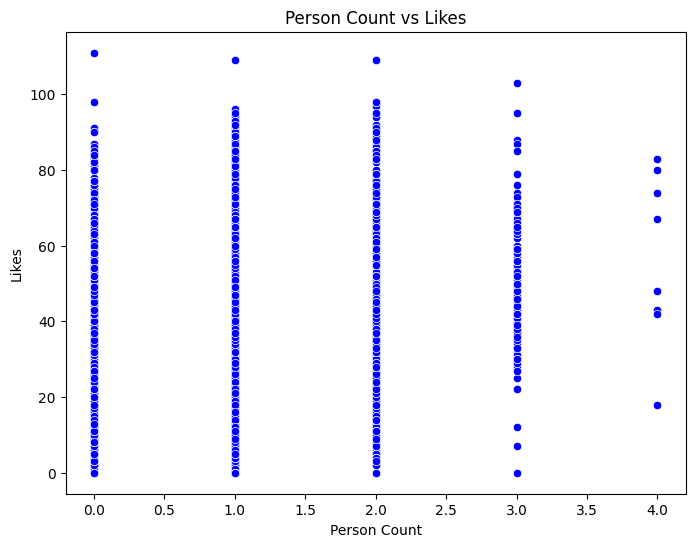

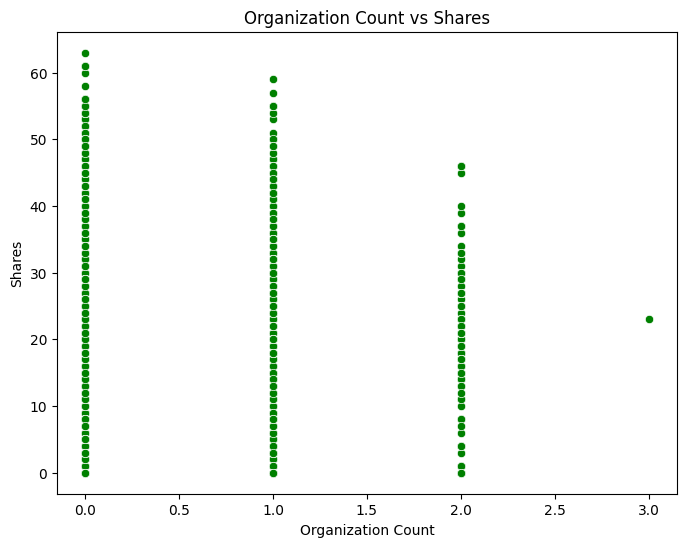

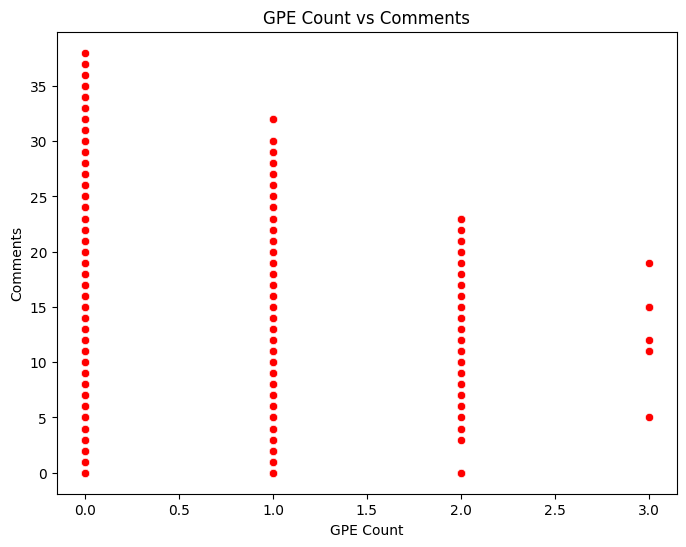

In [77]:
# Scatter plot for person_count vs likes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='person_count', y='likes', data=dataset, color='blue')
plt.title('Person Count vs Likes')
plt.xlabel('Person Count')
plt.ylabel('Likes')
plt.show()

# Scatter plot for org_count vs shares
plt.figure(figsize=(8, 6))
sns.scatterplot(x='org_count', y='shares', data=dataset, color='green')
plt.title('Organization Count vs Shares')
plt.xlabel('Organization Count')
plt.ylabel('Shares')
plt.show()

# Scatter plot for gpe_count vs comments
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gpe_count', y='comments', data=dataset, color='red')
plt.title('GPE Count vs Comments')
plt.xlabel('GPE Count')
plt.ylabel('Comments')
plt.show()


## Correlation Heatmap: Entity Counts and Engagement Metrics

In this section, we analyze the relationships between different entity counts (`person_count`, `org_count`, `gpe_count`) and engagement metrics (`likes`, `shares`, `comments`) using a correlation heatmap.

### Heatmap Overview:

A correlation heatmap is used to visualize the correlation coefficients between the selected variables. Correlation values range from -1 to 1, where:
- **1** indicates a perfect positive correlation.
- **-1** indicates a perfect negative correlation.
- **0** indicates no correlation.

The heatmap allows us to quickly assess the strength of relationships between the counts of entities and the engagement metrics.

### Code Breakdown:

1. **Correlation Calculation**:
   - The correlation matrix is calculated using the `corr()` function, which computes pairwise correlation coefficients for the selected columns: `person_count`, `org_count`, `gpe_count`, `likes`, `shares`, and `comments`.

2. **Heatmap Plot**:
   - A heatmap is created using **Seaborn's** `heatmap()` function. The correlation values are displayed within the cells using `annot=True`, and the color palette `coolwarm` is applied to visually indicate the strength of correlations.
   - The `fmt='.2f'` argument formats the correlation values to two decimal places.

### Insights:

- **Positive Correlations**:
  - Strong positive correlations between entity counts (such as person, organization, and GPE) and engagement metrics might suggest that higher counts of entities lead to increased likes, shares, or comments.
  
- **Negative Correlations**:
  - Negative correlations would suggest that as one variable increases, the other tends to decrease.
  
- **Weak or No Correlations**:
  - A correlation close to 0 suggests there is little to no linear relationship between the variables.

This heatmap serves as an effective tool to identify potential areas for further analysis and help understand how the entity counts are related to user interactions.


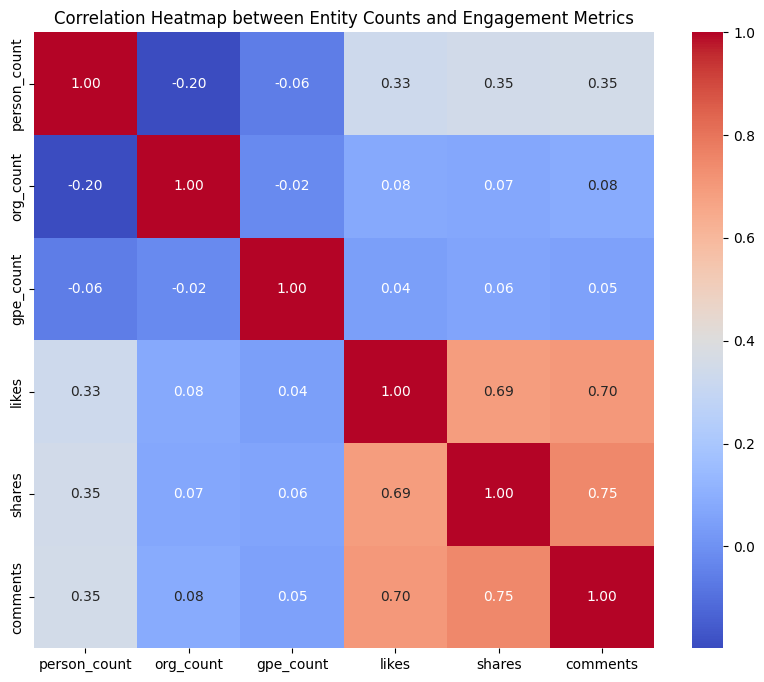

In [78]:
# Calculate correlation matrix
correlation_data = dataset[['person_count', 'org_count', 'gpe_count', 'likes', 'shares', 'comments']].corr()

# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Entity Counts and Engagement Metrics')
plt.show()


## 1. Load Pre-trained Model and Vectorizer

We start by loading a pre-trained Random Forest model and a TF-IDF vectorizer using `joblib`. These are used to predict the popularity of articles based on their titles.

```python
model = joblib.load('random_forest_model_with_smote.pkl')
vectorizer = joblib.load('tfidf_vectorizer_with_smote.pkl')


In [79]:
import joblib
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# Load the pre-trained random forest model and the vectorizer
model = joblib.load('random_forest_model_with_smote.pkl')
vectorizer = joblib.load('tfidf_vectorizer_with_smote.pkl')

# Load your dataset
df = pd.read_csv('dataset/resampled_data.csv')

# Apply NER to extract entities
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

# Extract entities from the 'title' column
df['entities'] = df['title'].apply(extract_entities)

# Transform the 'title' column using the pre-fitted vectorizer
X_title = vectorizer.transform(df['title'])

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with the correct feature names
X_title_df = pd.DataFrame(X_title.toarray(), columns=feature_names)

# Get the number of features the model expects
n_features_expected = model.n_features_in_  # This should work for most scikit-learn versions

# Align features
if X_title_df.shape[1] < n_features_expected:
    # Add missing features
    for i in range(X_title_df.shape[1], n_features_expected):
        X_title_df[f'additional_feature_{i}'] = 0
elif X_title_df.shape[1] > n_features_expected:
    # Remove extra features
    X_title_df = X_title_df.iloc[:, :n_features_expected]

# Ensure the order of features matches what the model expects
if hasattr(model, 'feature_names_in_'):
    X_title_df = X_title_df.reindex(columns=model.feature_names_in_, fill_value=0)

# Convert back to numpy array for prediction
X_title_aligned = X_title_df.values

# Predict the popularity using the pre-trained model
popularity_predictions = model.predict(X_title_aligned)

# Add the predictions to the dataframe
df['popularity_prediction'] = popularity_predictions

# Analyze correlation between popular news and fake/real news
correlation = df.groupby('popularity_prediction')['label'].value_counts(normalize=True)

# Show the correlation
print(correlation)

# Optionally, save the dataframe with popularity predictions and correlations
df.to_csv('news_with_popularity_and_correlation.csv', index=False)

print("Processing complete. Results saved to 'news_with_popularity_and_correlation.csv'")

popularity_prediction  label
0                      0        0.986254
                       1        0.013746
1                      1        0.664583
                       0        0.335417
Name: proportion, dtype: float64
Processing complete. Results saved to 'news_with_popularity_and_correlation.csv'


## 1. Bar Plot: Distribution of Fake/Real News in Popular vs Non-Popular News

The first visualization is a bar plot that shows the count of fake and real news articles, categorized by the popularity prediction. The popularity prediction is binary: 0 for non-popular and 1 for popular news.

```python
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='popularity_prediction', hue='label')
plt.title('Distribution of Fake/Real News in Popular vs Non-Popular News')
plt.xlabel('Popularity Prediction (0: Not Popular, 1: Popular)')
plt.ylabel('Count of News Articles')
plt.legend(title='Label', labels=['Fake', 'Real'])
plt.show()


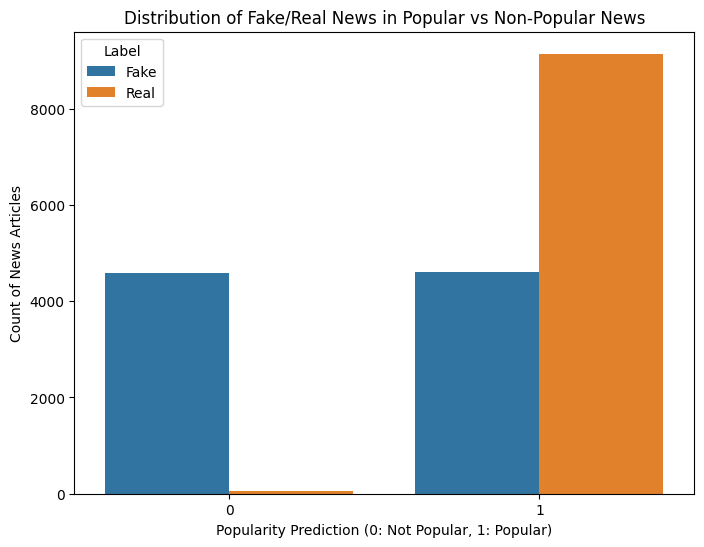

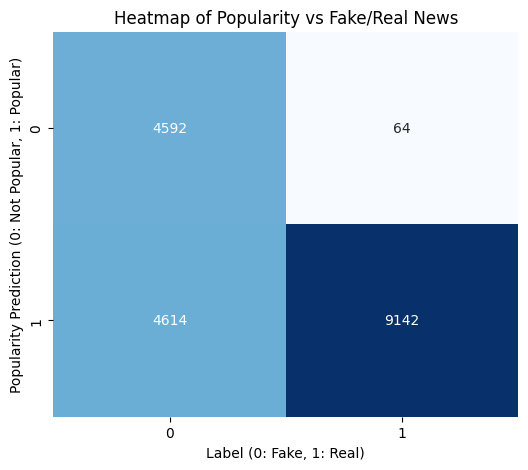

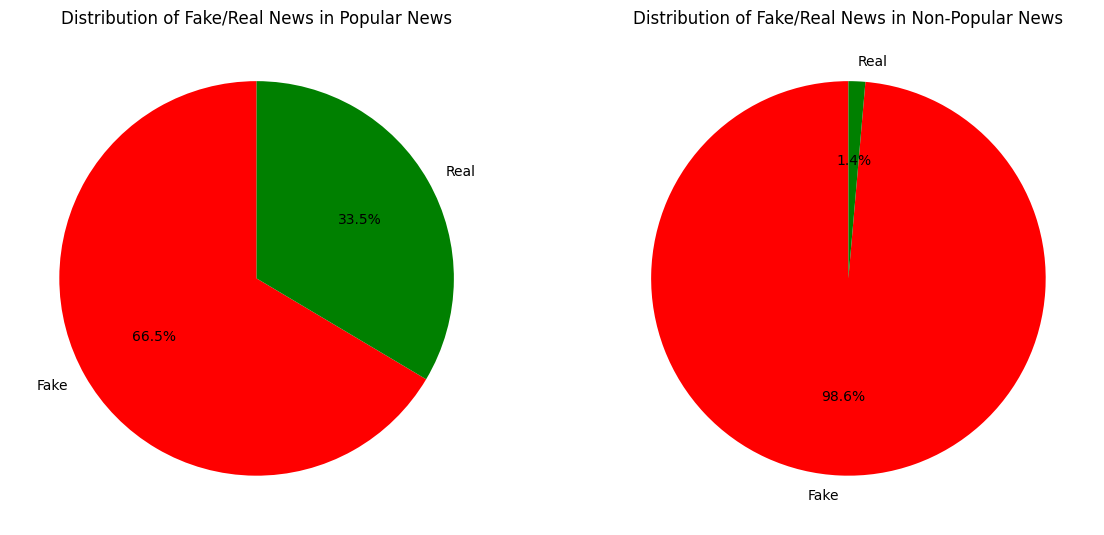

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Plot: Show the proportion of fake/real news for popular and non-popular news
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='popularity_prediction', hue='label')
plt.title('Distribution of Fake/Real News in Popular vs Non-Popular News')
plt.xlabel('Popularity Prediction (0: Not Popular, 1: Popular)')
plt.ylabel('Count of News Articles')
plt.legend(title='Label', labels=['Fake', 'Real'])
plt.show()

# 2. Heatmap: Show the correlation between popularity and fake/real news
# Create a contingency table
correlation_table = df.groupby(['popularity_prediction', 'label']).size().unstack(fill_value=0)
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Heatmap of Popularity vs Fake/Real News')
plt.xlabel('Label (0: Fake, 1: Real)')
plt.ylabel('Popularity Prediction (0: Not Popular, 1: Popular)')
plt.show()

# 3. Pie Chart: Show the proportion of fake/real news for popular vs non-popular news
# Proportion of fake/real news for popular news
popular_news = df[df['popularity_prediction'] == 1]
popular_news_pie = popular_news['label'].value_counts()

# Proportion of fake/real news for non-popular news
non_popular_news = df[df['popularity_prediction'] == 0]
non_popular_news_pie = non_popular_news['label'].value_counts()

# Create two pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for popular news
axes[0].pie(popular_news_pie, labels=['Fake', 'Real'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axes[0].set_title('Distribution of Fake/Real News in Popular News')

# Pie chart for non-popular news
axes[1].pie(non_popular_news_pie, labels=['Fake', 'Real'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
axes[1].set_title('Distribution of Fake/Real News in Non-Popular News')

plt.show()


### Data Visualization for Fake/Real News Analysis

This section provides visual representations of the relationship between the predicted popularity of news articles and their classification as fake or real. The visualizations used include a **count plot**, **heatmap**, and **pie charts**. These plots help in understanding the distribution and correlation of fake and real news articles across popular and non-popular categories.

#### 1. **Bar Plot: Distribution of Fake/Real News in Popular vs Non-Popular News**
The bar plot shows the count of fake and real news articles for each popularity category (Popular vs Non-Popular). The plot makes it easy to compare the distribution of fake and real news between these two categories.

#### 2. **Heatmap: Popularity vs Fake/Real News**
This heatmap illustrates the relationship between the popularity of news articles and their classification as fake or real. The contingency table is represented using a color scale, with annotations showing the counts for each combination of popularity and label.

#### 3. **Pie Chart: Proportion of Fake/Real News for Popular vs Non-Popular News**
Two pie charts are used to show the proportion of fake and real news articles within the popular and non-popular news categories. The pie charts make it easy to see the percentage of fake and real news in each category, helping to identify trends in news authenticity based on popularity.
